# Link to dataset :
https://www.kaggle.com/datasets/lainguyn123/student-performance-factors

# The imports 

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import root_mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pickle

# Reading and consulting the df

In [37]:
df = pd.read_csv('StudentPerformanceFactors.csv')

In [38]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [39]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

# Cleaning 

In [40]:
df.dropna(inplace=True)

# Training and evaluation


Model Performance Summary:

Linear Regression:
RMSE: 2.28
R2 Score: 0.66
Cross-validation R2 Score: 0.65 (±0.07)

Random Forest:
RMSE: 2.43
R2 Score: 0.62
Cross-validation R2 Score: 0.62 (±0.06)

Gradient Boosting:
RMSE: 2.18
R2 Score: 0.69
Cross-validation R2 Score: 0.68 (±0.07)

SVR:
RMSE: 2.07
R2 Score: 0.72
Cross-validation R2 Score: 0.71 (±0.07)

XGBoost:
RMSE: 2.37
R2 Score: 0.64
Cross-validation R2 Score: 0.63 (±0.06)


/tmp/ipykernel_6470/1602836973.py:99: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(names, rotation=45)


"\n# Load your DataFrame\ndf = pd.read_csv('student_data.csv')\n\n# Run the pipeline\nresults, importance_df = main(df)\n"

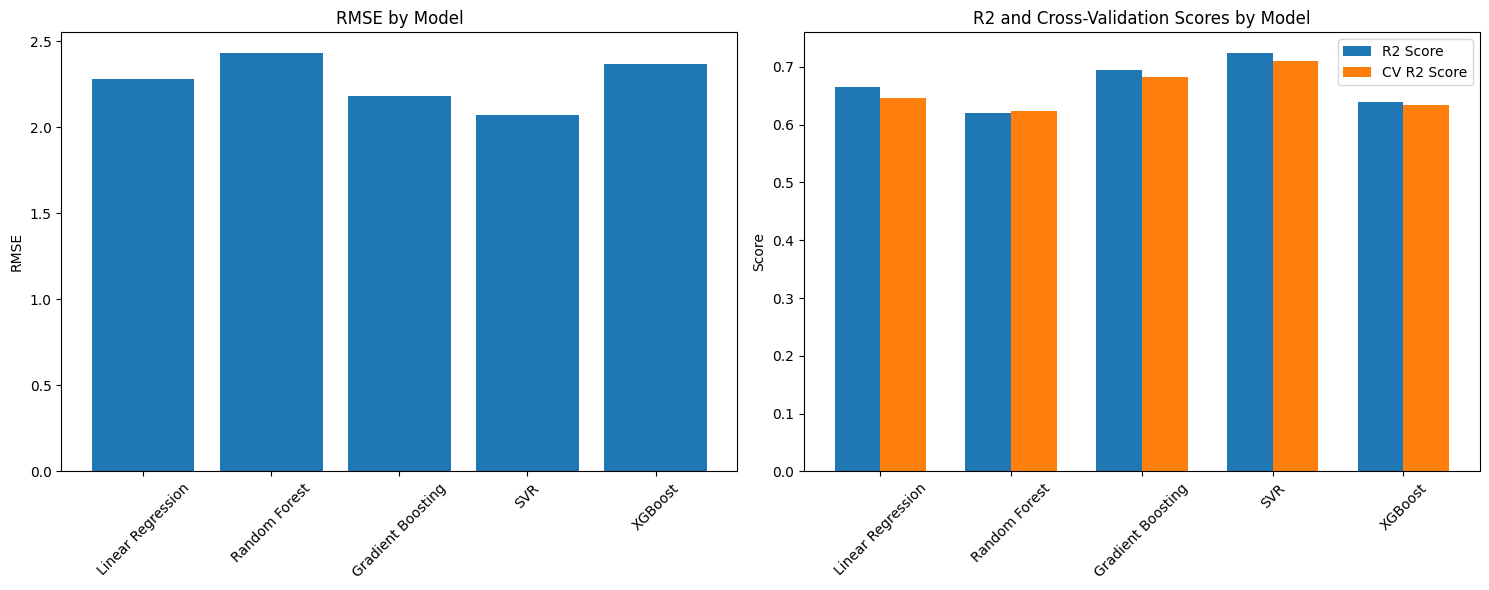

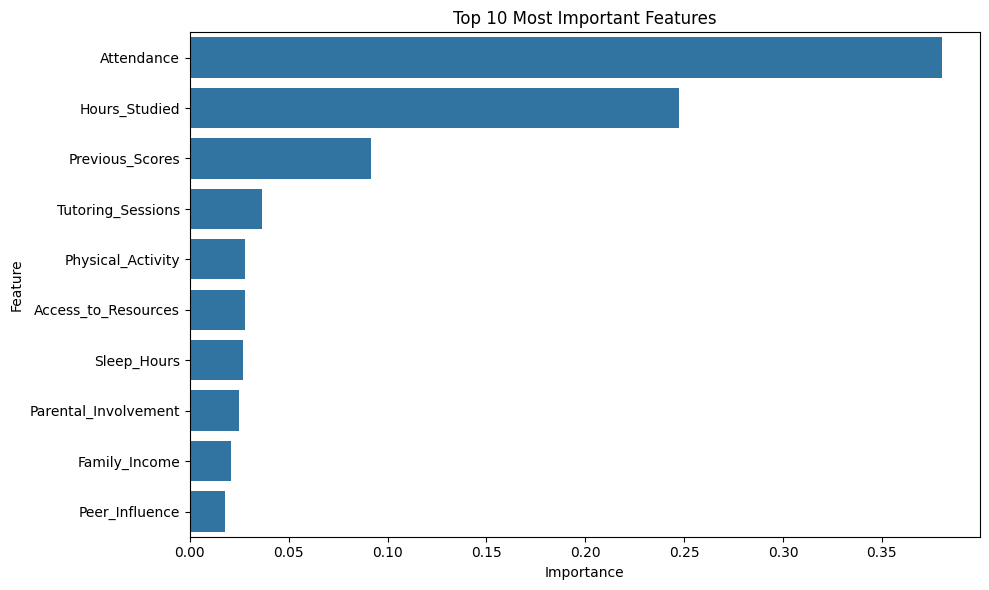

In [35]:
def prepare_data(df):
    """
    Prepare the data for machine learning by encoding categorical variables
    and scaling numerical features.
    """
    # Create copies to avoid modifying original data
    X = df.drop('Exam_Score', axis=1)
    y = df['Exam_Score']
    
    # Identify categorical and numerical columns
    categorical_cols = X.select_dtypes(include=['object']).columns
    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
    
    # Encode categorical variables
    le = LabelEncoder()
    for col in categorical_cols:
        X[col] = le.fit_transform(X[col])
    
    # Scale numerical features
    scaler = StandardScaler()
    X[numerical_cols] = scaler.fit_transform(X[numerical_cols])
    
    return X, y

def train_evaluate_models(X, y):
    """
    Train and evaluate multiple machine learning models.
    """
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize models
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
        'SVR': SVR(kernel='rbf'),
        'XGBoost': xgb.XGBRegressor(random_state=42)
    }
    
    # Dictionary to store results
    results = {}
    
    # Train and evaluate each model
    for name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        mse = root_mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        
        # Perform cross-validation
        cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
        
        # Store results
        results[name] = {
            'RMSE': rmse,
            'R2': r2,
            'CV_R2_mean': cv_scores.mean(),
            'CV_R2_std': cv_scores.std(),
            'Model': model
        }
    
    return results, X_train, X_test, y_train, y_test

def plot_results(results):
    """
    Create visualizations of model performance.
    """
    # Prepare data for plotting
    names = list(results.keys())
    rmse_scores = [results[name]['RMSE'] for name in names]
    r2_scores = [results[name]['R2'] for name in names]
    cv_scores = [results[name]['CV_R2_mean'] for name in names]
    # Create figure with subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    # Plot RMSE scores
    ax1.bar(names, rmse_scores)
    ax1.set_title('RMSE by Model')
    ax1.set_xticklabels(names, rotation=45)
    ax1.set_ylabel('RMSE')
    # Plot R2 and CV scores
    x = np.arange(len(names))
    width = 0.35
    ax2.bar(x - width/2, r2_scores, width, label='R2 Score')
    ax2.bar(x + width/2, cv_scores, width, label='CV R2 Score')
    ax2.set_title('R2 and Cross-Validation Scores by Model')
    ax2.set_xticks(x)
    ax2.set_xticklabels(names, rotation=45)
    ax2.set_ylabel('Score')
    ax2.legend()    
    plt.tight_layout()
    return fig
def feature_importance(X, model):
    """
    Calculate and plot feature importance for tree-based models.
    """
    if hasattr(model, 'feature_importances_'):
        importance = model.feature_importances_
        features = X.columns
        # Create DataFrame of features and their importance scores
        feat_imp = pd.DataFrame({
            'Feature': features,
            'Importance': importance
        }).sort_values('Importance', ascending=False)
        # Plot feature importance
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feat_imp.head(10))
        plt.title('Top 10 Most Important Features')
        plt.tight_layout()
        
        return feat_imp

# Prepare the data
X, y = prepare_data(df)

# Train and evaluate models
results, X_train, X_test, y_train, y_test = train_evaluate_models(X, y)

# Print results
print("\nModel Performance Summary:")
print("=" * 50)
for name, metrics in results.items():
    print(f"\n{name}:")
    print(f"RMSE: {metrics['RMSE']:.2f}")
    print(f"R2 Score: {metrics['R2']:.2f}")
    print(f"Cross-validation R2 Score: {metrics['CV_R2_mean']:.2f} (±{metrics['CV_R2_std']:.2f})")

# Plot results
plot_results(results)

# Get feature importance from Random Forest model
rf_model = results['Random Forest']['Model']
importance_df = feature_importance(X, rf_model)

# Saving the model ,the scaler and encoders

In [36]:
def prepare_data(df):
    """
    Prepare the data for machine learning by encoding categorical variables
    and scaling numerical features.
    """
    # Create copies to avoid modifying original data
    X = df.drop('Exam_Score', axis=1)
    y = df['Exam_Score']
    
    # Identify categorical and numerical columns
    categorical_cols = X.select_dtypes(include=['object']).columns
    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
    
    # Initialize dictionary to store label encoders
    label_encoders = {}
    
    # Encode categorical variables
    for col in categorical_cols:
        label_encoders[col] = LabelEncoder()
        X[col] = label_encoders[col].fit_transform(X[col])
    
    # Scale numerical features
    scaler = StandardScaler()
    X[numerical_cols] = scaler.fit_transform(X[numerical_cols])
    
    return X, y, scaler, label_encoders, numerical_cols, categorical_cols

def train_and_save_model(df, model_path='model.pkl', scaler_path='scaler.pkl', encoders_path='label_encoders.pkl'):
    """
    Train the model and save all necessary components for prediction
    """
    # Prepare the data
    X, y, scaler, label_encoders, numerical_cols, categorical_cols = prepare_data(df)
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train Random Forest model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    
    # Save the model
    with open(model_path, 'wb') as file:
        pickle.dump(rf_model, file)
    
    # Save the scaler
    with open(scaler_path, 'wb') as file:
        pickle.dump(scaler, file)
    
    # Save the label encoders
    with open(encoders_path, 'wb') as file:
        pickle.dump(label_encoders, file)
    
    # Save column information
    with open('column_info.pkl', 'wb') as file:
        pickle.dump({
            'numerical_cols': numerical_cols,
            'categorical_cols': categorical_cols
        }, file)
    
    print("Model and preprocessing objects saved successfully!")
    
    # Return the test score
    test_score = rf_model.score(X_test, y_test)
    print(f"Model R² Score on test data: {test_score:.4f}")
    
    return rf_model, scaler, label_encoders

model, scaler, encoders = train_and_save_model(df)

Model and preprocessing objects saved successfully!
Model R² Score on test data: 0.6197
